In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [125]:
def computeStdRegionsPerTick(listAreaRegionsTicks):
    sigma = []

    for tick in range(len(listAreaRegionsTicks)):
        sigma.append(np.std(listAreaRegionsTicks[tick]))

    return sigma

In [178]:
def get_means_stds(directory):
    
    ticks = []
    std_areas = []

    for (root, subdirs, files) in os.walk(directory):
        for subdir in subdirs:
            data = pd.read_csv(os.path.join(root, subdir, "data_voronoiData.csv"))
            if len(ticks) == 0 or len(ticks) > len(data["Tick"]):
                ticks = data["Tick"]
            std = computeStdRegionsPerTick(data[data.columns[1:]].to_numpy())
            if len(std) > len(ticks):
                std = std[:len(ticks) - len(std)]
            std_areas.append(std)
        break
        
    for i in range(len(std_areas)):
        if len(std_areas[i]) > len(ticks):
            std_areas[i] = std_areas[i][:len(ticks) - len(std_areas[i])]
        
    std_areas = np.vstack(std_areas)
    means = std_areas.mean(axis=0)
    stds = std_areas.std(axis=0, ddof=1)
    
    return ticks, means, stds

In [191]:
def plot_sd_graph(directory1, directory2 = '', divide_by=1):
    
    ticks, means, stds = get_means_stds(directory1)
    plt.plot(ticks, means, label=directory1)
    plt.fill_between(ticks, means - stds, means + stds, alpha=0.3)
    
    if directory2 != '':
        ticks, means, stds = get_means_stds(directory2)
        plt.plot(ticks/divide_by, means, label=directory2)
        plt.fill_between(ticks/divide_by, means - stds, means + stds, alpha=0.3)
    
    plt.xlabel("ticks (32 ticks = 1 second)")
    plt.ylabel("Average standard deviation of Voronoi areas (mm²)")
    plt.legend(loc="lower right")
    plt.ylim(0)
    plt.show()

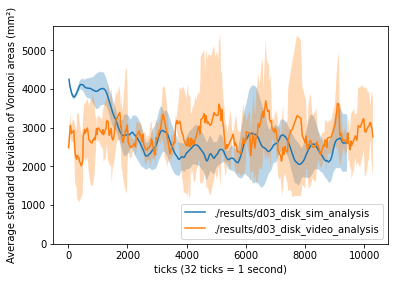

In [192]:
plot_sd_graph("./results/d03_disk_sim_analysis", "./results/d03_disk_video_analysis", divide_by=2)

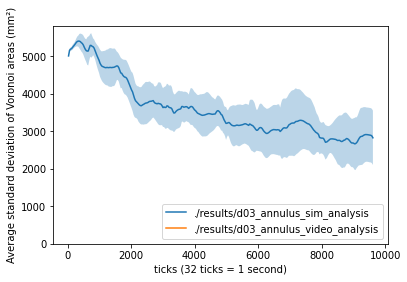

In [183]:
plot_sd_graph("./results/d03_annulus_sim_analysis", "./results/d03_annulus_video_analysis", divide_by=2)

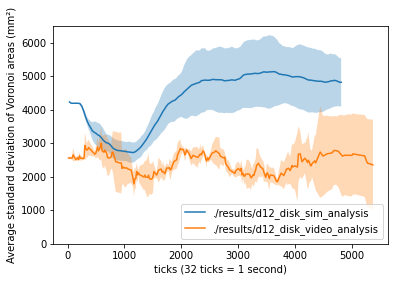

In [184]:
plot_sd_graph("./results/d12_disk_sim_analysis", "./results/d12_disk_video_analysis", divide_by=2)

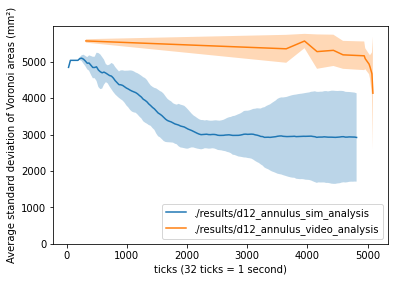

In [185]:
plot_sd_graph("./results/d12_annulus_sim_analysis", "./results/d12_annulus_video_analysis", divide_by=2)

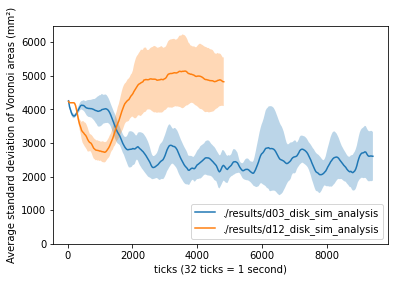

In [195]:
plot_sd_graph("./results/d03_disk_sim_analysis", "./results/d12_disk_sim_analysis")

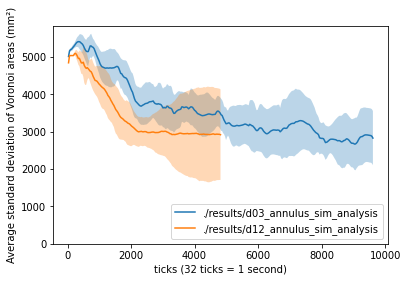

In [196]:
plot_sd_graph("./results/d03_annulus_sim_analysis", "./results/d12_annulus_sim_analysis")